# Dimensionality Reduction and Feature Selection

Objective:
The primary aim of this study is based on several categorical features, you will predict whether or not a mushroom is edible or poisonous.

Data Source: https://www.kaggle.com/datasets/uciml/mushroom-classification

# 7.2 Exercise: Dimensionality Reduction and Feature Selection
## Part 2: Categorical Feature Selection
.

In [2]:
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

Data Source: https://www.kaggle.com/datasets/uciml/mushroom-classification

Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

## 1. Import the data as a data frame and ensure it is loaded correctly.

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2, f_classif
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the mushroom dataset (replace 'mushrooms.csv' with the actual file path)
df = pd.read_csv('mushrooms.csv')

# Check the first few rows of the dataset to ensure it's loaded correctly
print(df.head(3))

# Display total number of rows and columns
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o      

## 2. Convert the categorical features (all of them) to dummy variables.

In [7]:
# Convert all categorical features to dummy variables
df_dummies = pd.get_dummies(df)

# Check the first few rows of the dummy variables dataframe
print(df_dummies.head(3))

# Display total number of rows and columns
nRow, nCol = df_dummies.shape
print(f'There are {nRow} rows and {nCol} columns')

   class_e  class_p  cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  \
0    False     True        False        False        False        False   
1     True    False        False        False        False        False   
2     True    False         True        False        False        False   

   cap-shape_s  cap-shape_x  cap-surface_f  cap-surface_g  ...  population_s  \
0        False         True          False          False  ...          True   
1        False         True          False          False  ...         False   
2        False        False          False          False  ...         False   

   population_v  population_y  habitat_d  habitat_g  habitat_l  habitat_m  \
0         False         False      False      False      False      False   
1         False         False      False       True      False      False   
2         False         False      False      False      False       True   

   habitat_p  habitat_u  habitat_w  
0      False       True      Fal

## 3. Split the data into a training and test set.

In [9]:
# Define the features and target variable
X = df_dummies.drop('class_e', axis=1)  

# 'class_e' is the target variable (edible or poisonous)
y = df_dummies['class_e']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the first 5 rows of train data
print("First 5 rows:")
print(y_test.head(5))


First 5 rows:
1971     True
6654    False
5606    False
3332     True
6988    False
Name: class_e, dtype: bool


## 4. Fit a decision tree classifier on the training set.

In [11]:
# Create and fit the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict on the test set
y_pred = dt.predict(X_test)

## 5. Report the accuracy and create a confusion matrix for the model prediction on the test set.

In [13]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 1.0000


Confusion Matrix:
 [[782   0]
 [  0 843]]


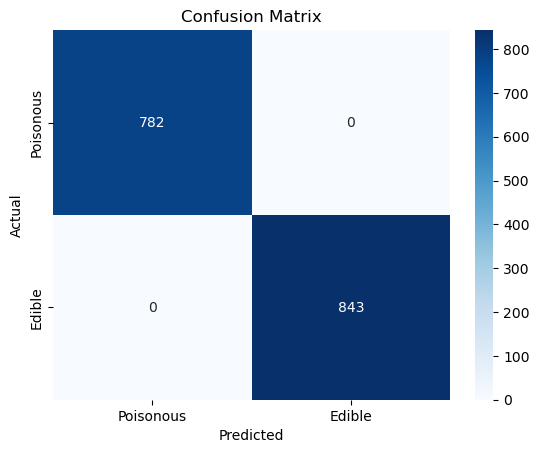

In [14]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

# Optionally, use Seaborn to visualize the confusion matrix
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Poisonous', 'Edible'], yticklabels=['Poisonous', 'Edible'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 6. Visualize the Decision Tree

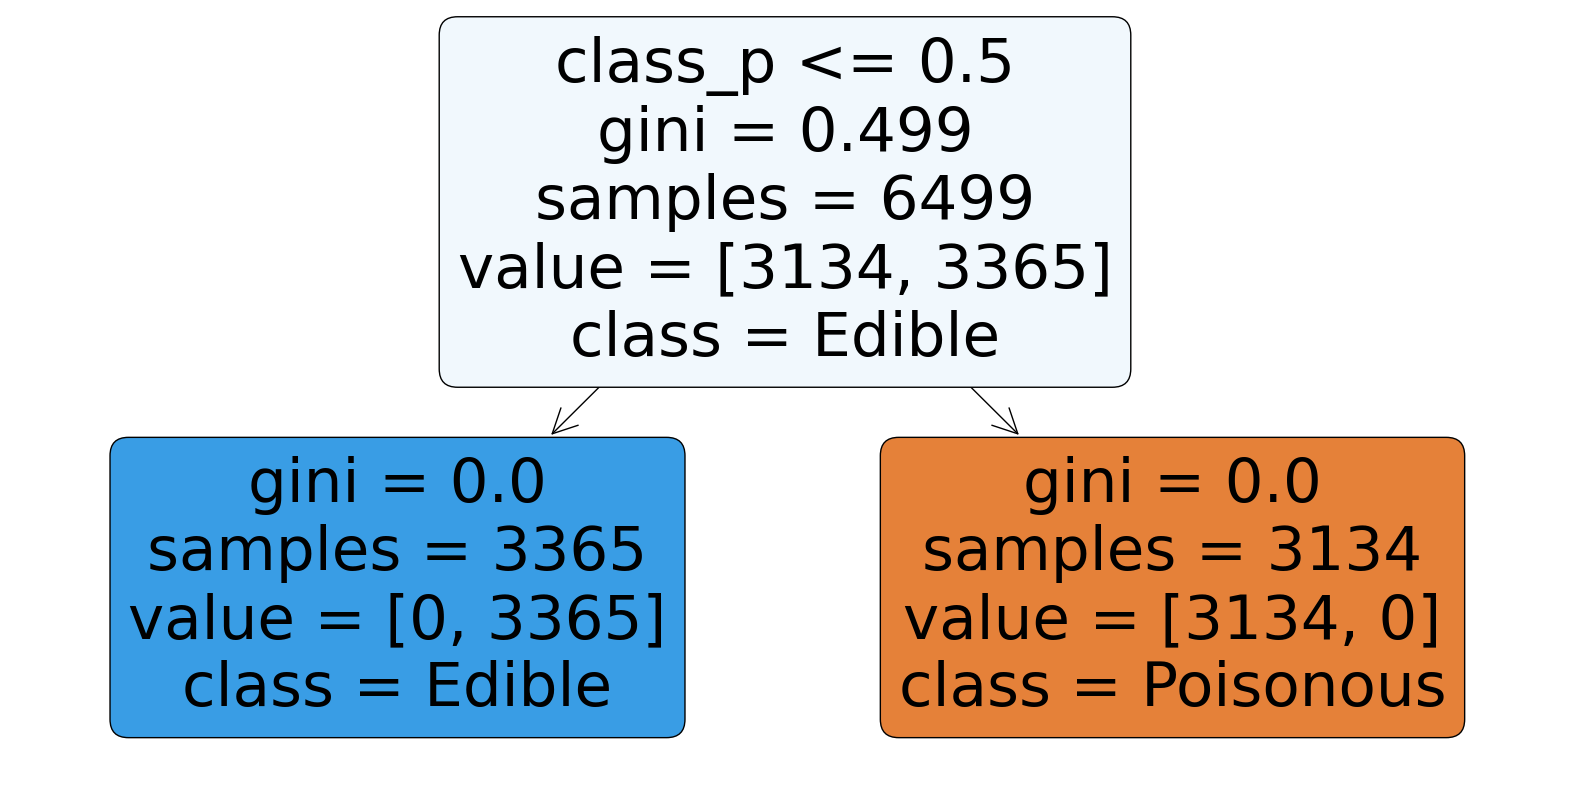

In [16]:
# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['Poisonous', 'Edible'], rounded=True)
plt.show()

## 7. Use a χ2-statistic selector to pick the five best features for this data

In [18]:
# Apply SelectKBest with the χ² statistic to select the top 5 features

# select 5 features with highest chi-squared statistics
chi2_selector = SelectKBest(score_func=chi2, k=5)
X_new = chi2_selector.fit_transform(X_train, y_train)

# Original number of feature
print("Original number of features:", X_train.shape[1])

# Reduced number of feature
print("Reduced number of features:", X_new.shape[1])

# Display the first few rows of train data
print("First rows:")
print(X_new)

Original number of features: 118
Reduced number of features: 5
First rows:
[[ True False False False  True]
 [ True  True False  True False]
 [ True False False False False]
 ...
 [False False False False False]
 [ True  True False False False]
 [False False  True False  True]]


## 8. Which five features were selected in step 7? 
Use the get_support function.

In [20]:
# Get the selected feature columns
selected_features = X.columns[chi2_selector.get_support()]
print(f'Selected Features: {selected_features}')

Selected Features: Index(['class_p', 'odor_f', 'odor_n', 'stalk-surface-above-ring_k',
       'stalk-surface-below-ring_k'],
      dtype='object')


## 9. Repeat steps 4 and 5 with the five best features selected in step 7.

In [22]:
# Subset the training and test sets to include only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Create and fit the Decision Tree model with selected features
dt_selected = DecisionTreeClassifier(random_state=42)
dt_selected.fit(X_train_selected, y_train)

# Predict and calculate accuracy on the selected features
y_pred_selected = dt_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print(f'Accuracy with selected features: {accuracy_selected:.4f}')

# Confusion matrix with selected features
cm_selected = confusion_matrix(y_test, y_pred_selected)
print('Confusion Matrix with selected features:\n', cm_selected)

Accuracy with selected features: 1.0000
Confusion Matrix with selected features:
 [[782   0]
 [  0 843]]


## 10. Summarize your findings.

Summarizing Findings:

Accuracy: Initially, the decision tree model achieved an accuracy of 1 on the full set of features, and after selecting the five best features, the accuracy was 1, indicating that feature selection had little to no impact on accuracy.


Most of the classification methods hit 100% accuracy with this dataset.
Confusion Matrix: The confusion matrix shows that both models performed similarlOur train and test data is balanced.
e.

Selected Features: The five best features selected by the χ²-statistic were'class_p', 'odor_f', 'odor_n', 'stalk-surface-above-ring_k', 'stalk-surface-below-ring_k'at_k'